In [2]:
# Linear Regression on ONE table

In [7]:
!curl https://github.com/jdwittenauer/ipython-notebooks/blob/master/data/ex1data1.txt -o data/ex1data2.txt

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88708    0 88708    0     0   7699      0 --:--:--  0:00:11 --:--:-- 16298


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
import os 
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header = None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


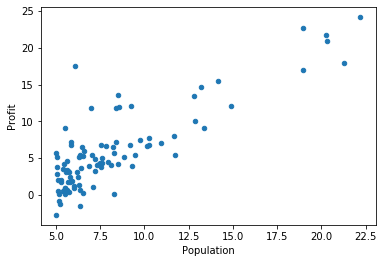

In [8]:
data.plot(kind = 'scatter', x='Population', y='Profit')

Create a function to compute the cost of a given solution (characterized by the parameters theta).

In [9]:
def computeCost(x, y, theta):
    inner = np.power(((x * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(x))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [10]:
data.insert(0, 'Ones', 1)

In [11]:
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
Y = data.iloc[:, cols-1:cols]

In [12]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [13]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize theta.

In [15]:
x = np.matrix(X.values)
y = np.matrix(Y.values)
theta = np.matrix(np.array([0,0]))

In [16]:
theta

matrix([[0, 0]])

In [19]:
computeCost(x, y, theta)

32.072733877455676

So far so good. Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

In [22]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [23]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [27]:
g, cost = gradientDescent(x, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [28]:
computeCost(x, y, g)

4.515955503078912

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

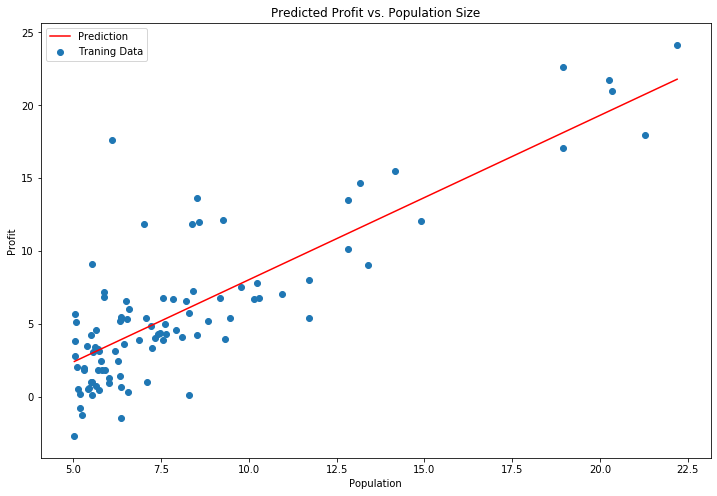

In [29]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


Looks pretty good! Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well. Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

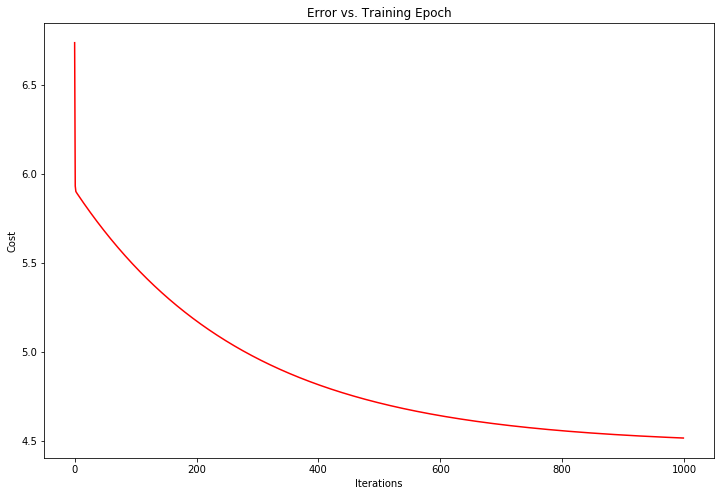

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Use Numpy and Sklearn

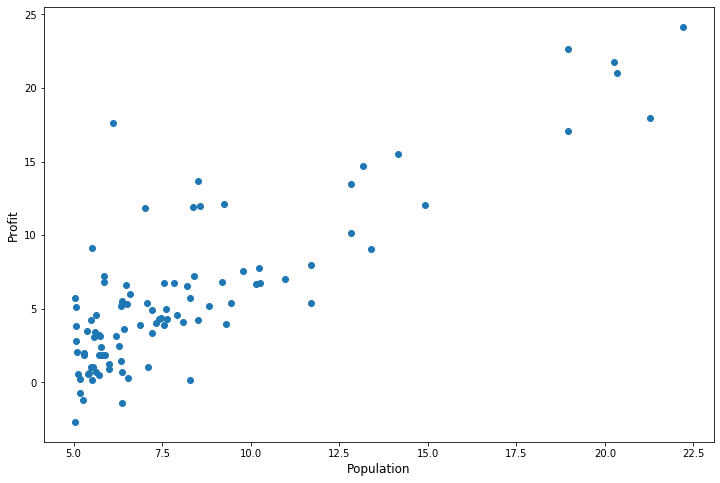

In [7]:
x, y = np.loadtxt(path, delimiter=',', usecols=(0, 1), unpack=True)

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()

# Perform Linear Regression with Numpy <b> Polyfit </b> function

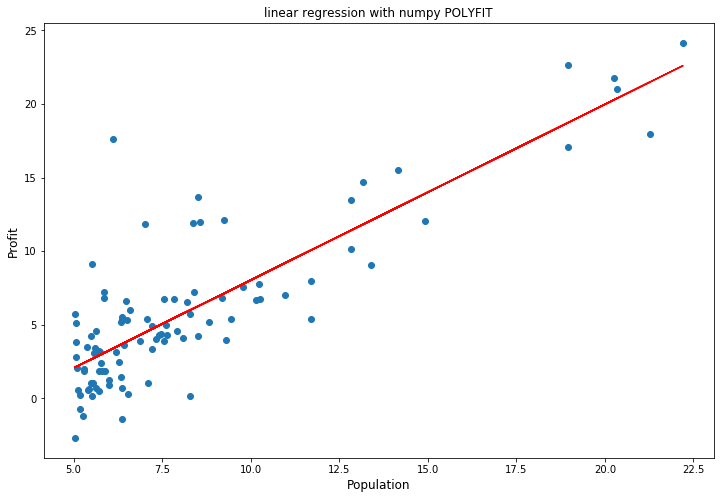

y = 1.193033644189594 * x + -3.8957808783118546


In [13]:
# create a linear regression from the data points
m,b = np.polyfit(x, y, 1)

# this is a simple y = mx + b line function
def f(x):
    return m * x + b

# this generates the same scatter plot before
# but adds a line plot using the function above
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, f(x), 'r')
plt.title("linear regression with numpy POLYFIT")
plt.xlabel('Population', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

# Perform Linear Regression with Sklearn Linear Regression function

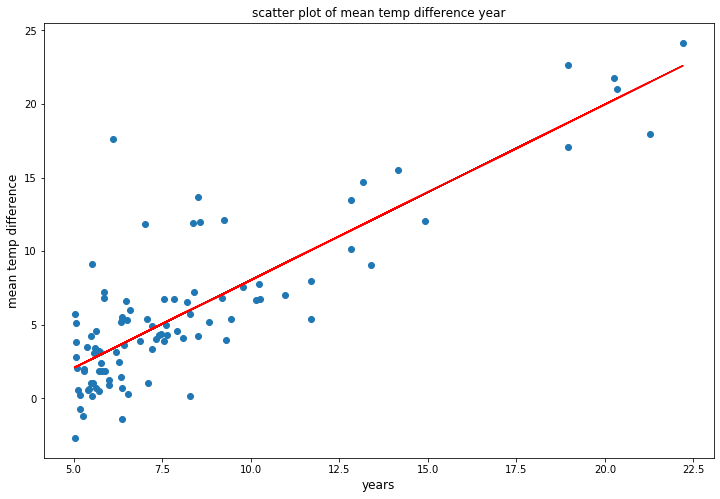

y = 1.1930336441895935 * x + -3.89578087831185


In [14]:
from sklearn.linear_model import LinearRegression

# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept = True)

# Fit/build the model
model.fit(x[:, np.newaxis], y)
mean_predicted = model.predict(x[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, mean_predicted, 'r')
plt.title("scatter plot of mean temp difference year")
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))